In [1]:
# import modules, read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_csv(r'C:\Users\siyua\Desktop\courses\Applied Machine Learning\HW1_dataset\fire_nrt_V1_96617.csv')
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [2]:
# prepare data for plotting.
#whole dataset
lat = df['latitude']
lon = df['longitude']
#subsample dataset
import random
df_sample = df.sample(n=10000)
lat_sub = df_sample['latitude']
lon_sub = df_sample['longitude']
# lat_sub = random.sample(lat, 10000)
# lon_sub = random.smaple(lon, 10000)
# lat_sub = [lat[i] for i in range(len(lat)) if i%10 ==0]
# lon_sub = [lon[i] for i in range(len(lon)) if i%10 ==0]

<h2>Task 1: Density Plots (50 points)</h2>
<h3>
    
1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):
    
1) Using the matplotlib defaults.
    
2) Adjusting alpha and marker size to compensate for overplotting.

3) Using a hexbin plot.

4) Subsampling the dataset.

</h3>

Text(0.5, 1.0, '4')

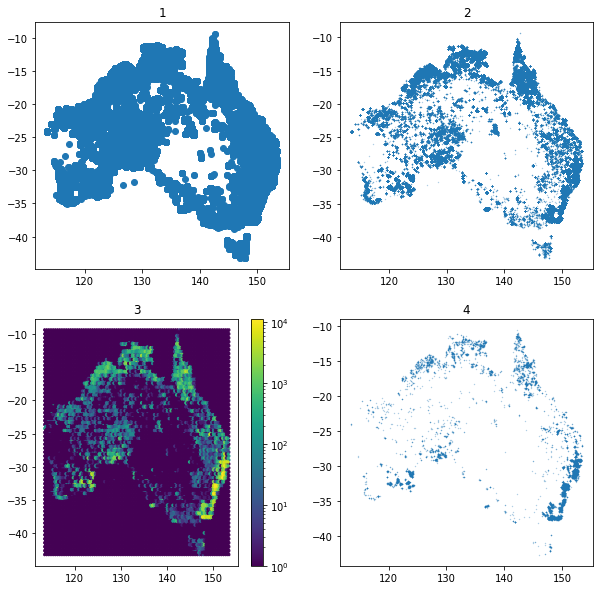

In [3]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(lon, lat)
ax[0,0].set_title('1')
ax[0,1].scatter(lon,lat,alpha=0.5 ,s=0.1)
ax[0,1].set_title('2')
hb = ax[1,0].hexbin(lon,lat, bins='log')
fig.colorbar(hb,ax=ax[1,0])
ax[1,0].set_title('3')
ax[1,1].scatter(lon_sub,lat_sub,alpha=0.5,s=0.1)
ax[1,1].set_title('4')

<h3>1.2 In what areas are most of the anomalies (measurements) located? [5pts] </h3>

<h3>Answer: The areas where most of the anomalies are located are Southeast, Southwest and North Coast.</h3>

<h2>Task 2: Visualizing class membership (50 points)</h2>
<h3>

Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriatesettings). We are certain of a fire if this value is saturated.
</h3>

(array([6.1900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2000e+01, 8.0000e+00, 1.5000e+01,
        1.3000e+01, 1.8000e+01, 2.0000e+01, 3.0000e+01, 3.4000e+01,
        3.1000e+01, 3.4000e+01, 9.5340e+03, 2.7087e+04, 4.1801e+04,
        5.6359e+04, 5.6646e+04, 4.8274e+04, 3.9263e+04, 3.1650e+04,
        2.7626e+04, 2.3935e+04, 2.1521e+04, 3.2367e+04, 3.9266e+04,
        4.5904e+04, 5.0193e+04, 5.3479e+04, 5.6207e+04, 5.5301e+04,
        5.3928e+04, 4.8268e+04, 5.9700e+02, 0.0000e+00, 1.3618e+05]),
 array([208.  , 211.18, 214.36, 217.54, 220.72, 223.9 , 227.08, 230.26,
        233.44, 236.62, 239.8 , 242.98, 246.16, 249.34, 252.52, 255.7 ,
        258.88, 262.06, 265.24, 268.42, 271.6 , 274.78, 277.96, 281.14,
        284.32, 287.5 , 290.68, 293.86, 297.04, 300.22, 303.4 , 306.58,
        309.76, 312.94, 316.12

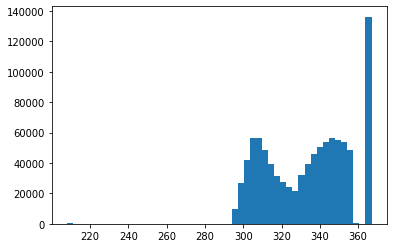

In [4]:
plt.hist(df.bright_ti4,bins=50)

<h3>2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vslong for those points with brightness saturated and a separate for those who are not (within thesame figure on separate axes). You can pick any of the methods from 1.1 that you find mostsuitable. Can you spot differences in the distributions? [20 pts]</h3>

In [5]:
#separate saturated and unsaturated
df_saturated = df[df.bright_ti4 == 367]
df_unsaturated = df[df.bright_ti4 < 367]
lat_saturated = df_saturated.latitude
lon_saturated = df_saturated.longitude
lat_unsaturated = df_unsaturated.latitude
lon_unsaturated = df_unsaturated.longitude

Text(0.5, 1.0, 'unsaturated')

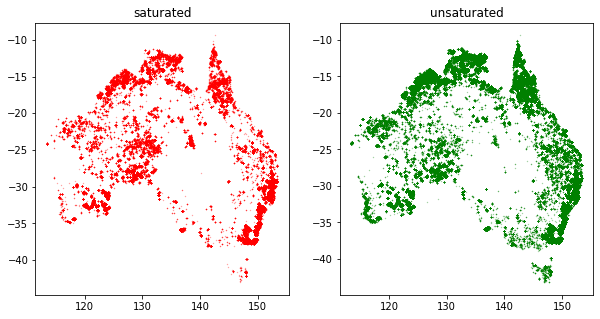

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(lon_saturated, lat_saturated,alpha=0.5 ,s=0.1,c='r')
ax[0].set_title('saturated')
ax[1].scatter(lon_unsaturated,lat_unsaturated,alpha=0.5 ,s=0.1,c='g')
ax[1].set_title('unsaturated')

<h3>Difference: In the saturated one, we can more easily identify the accurate region of these anomalies.</h3>

<h3>2.2 Plot both groups in the same axes with different colors. Try changing the order of plottingthe two classes (i.e. draw the saturated first then the non-saturated or the other way around).Make sure to include a legend. How does that impact the result? [20 pts]</h3>

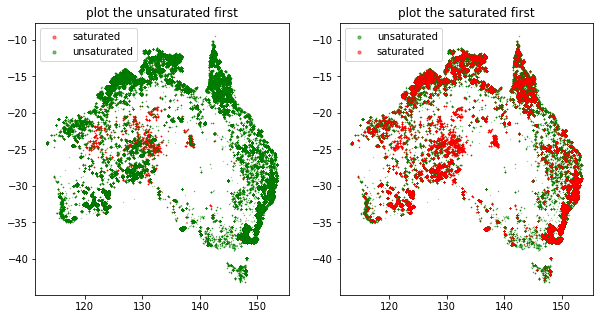

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(lon_saturated, lat_saturated,alpha=0.5 ,s=0.1,c='r',label = 'saturated')
ax[0].scatter(lon_unsaturated,lat_unsaturated,alpha=0.5 ,s=0.1,c='g',label = 'unsaturated')
ax[0].set_title('plot the unsaturated first')
ax[1].scatter(lon_unsaturated,lat_unsaturated,alpha=0.5 ,s=0.1,c='g',label = 'unsaturated')
ax[1].scatter(lon_saturated, lat_saturated,alpha=0.5 ,s=0.1,c='r',label = 'saturated')
ax[1].set_title('plot the saturated first')
#modify the legend marker size.
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0]._sizes=[10]
lgnd0.legendHandles[1]._sizes=[10]
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0]._sizes=[10]
lgnd1.legendHandles[1]._sizes=[10]

<h3>If I plot the saturated first, we can see saturated points much more clearly. I think the lesson is to plot the small dataset first, otherwise it will be covered up by a large dataset.</h3>

<h3>2.3 Can you find a better way to compare the two distributions? [10pts]</3>

Text(0.5, 1.0, 'later Unsaturated')

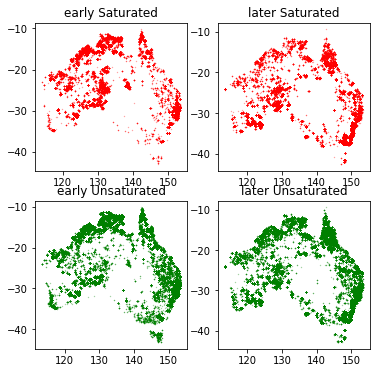

In [10]:
# from datetime import datetime
# df_saturated.acq_date = df_saturated.acq_date.apply(lambda x:datetime.strptime(x, "%Y-%m-%d"))
# df_unsaturated.acq_date = df_unsaturated.acq_date.apply(lambda x:datetime.strptime(x, "%Y-%m-%d"))
# df_early_S = df_saturated[df_saturated['acq_date']<=datetime(2019,11,30)]
# df_later_S = df_saturated[df_saturated['acq_date']>datetime(2019,11,30)]
# df_early_U = df_unsaturated[df_unsaturated['acq_date']<=datetime(2019,11,30)]
# df_later_U = df_unsaturated[df_unsaturated['acq_date']>datetime(2019,11,30)]
# lat_early_S = df_early_S['latitude']
# lon_early_S = df_early_S['longitude']
# lat_later_S = df_later_S['latitude']
# lon_later_S = df_later_S['longitude']
# lat_early_U = df_early_U['latitude']
# lon_early_U = df_early_U['longitude']
# lat_later_U = df_later_U['latitude']
# lon_later_U = df_later_U['longitude']
fig, ax = plt.subplots(2,2,figsize=(6,6))
ax[0,0].scatter(lon_early_S,lat_early_S,alpha=0.5,s=0.1,c='r')
ax[0,0].set_title('early Saturated')
ax[0,1].scatter(lon_later_S,lat_later_S,alpha=0.5,s=0.1,c='r')
ax[0,1].set_title('later Saturated')
ax[1,0].scatter(lon_early_U,lat_early_U,alpha=0.5,s=0.1,c='g')
ax[1,0].set_title('early Unsaturated')
ax[1,1].scatter(lon_later_U,lat_later_U,alpha=0.5,s=0.1,c='g')
ax[1,1].set_title('later Unsaturated')

<h3>I add time factor into comparison. I plot these tow groups in early months and later months The result shows that the southeast coast and northeast coast is getting more saturated and unsaturated points. In the meantime, the northwest part of east coast is getting less points. It probably shows that the fire situation in northeastern and southeast coast are getting severer in later months, but in the northwest region it is getting mitigated.</h3>